In [34]:
#%%javascript
#IPython.OutputArea.auto_scroll_threshold = 9999

In [35]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import statistics
import itertools

%matplotlib inline

In [36]:
def generate_box_plots(runtime, parameters, snaps, kernels=None):
    
    if kernels is None:
        for par in parameters:
            data = []
            label = []
            for snap in snaps:
                cpu = runtime[f'cpu_{snap}_{par}'][2:]
                gpu = runtime[f'gpu_{snap}_{par}'][2:]
                data.append(cpu)
                label.append(f'cpu_snaps_{snap}')
                data.append(gpu)
                label.append(f'gpu_snaps_{snap}')
            boxplots(data, label, par)
            if par == 'nettrain':
                data = []
                label = []
                for snap in snaps:
                    cpu = np.array(runtime[f'cpu_{snap}_{par}'][2:])/20
                    gpu = np.array(runtime[f'gpu_{snap}_{par}'][2:])/20
                    data.append(cpu)
                    label.append(f'cpu_snaps_{snap}')
                    data.append(gpu)
                    label.append(f'gpu_snaps_{snap}')
                boxplots(data, label, 'nettrain_per_epoch')
    else:
        for par in parameters:
            for ker in kernels:
                data = []
                label = []
                for snap in snaps:
                    cpu = runtime[f'cpu_{ker}_{snap}_{par}'][2:]
                    gpu = runtime[f'gpu_{ker}_{snap}_{par}'][2:]
                    data.append(cpu)
                    label.append(f'cpu_snaps_{snap}')
                    data.append(gpu)
                    label.append(f'gpu_snaps_{snap}')
                boxplots(data, label, par+' '+ker)
            
def boxplots(data, label, par):
    fig = plt.figure(figsize =(10, 6))
    ax = fig.add_subplot(111)
    # Creating axes instance
    bp = ax.boxplot(data, patch_artist = True,
                    notch = False, vert = 0, showfliers=False)

    colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green']
    colors_median = ['red', 'orange', 'red', 'orange', 'red', 'orange']

    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # changing color and linewidth of whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                        linewidth = 1.5,
                        linestyle =":")

    # changing color and linewidth of caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                    linewidth = 2)

    # changing color and linewidth of medians
    for median, color in zip(bp['medians'], colors_median):
        median.set(color = color,
                       linewidth = 3)

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                      color ='#e7298a',
                      alpha = 0.5)

    # x-axis labels
    ax.set_yticklabels(label, fontsize=16)
    ax.tick_params(axis='x', labelsize=16)
    ax.set_xlabel('Time(s)', loc='center', fontsize=16)
    
    if 'parameters' in par:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
        ax.tick_params(axis='x', which='major', labelsize=12)
    elif 'sethypparam' in par:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
        ax.tick_params(axis='x', which='major', labelsize=12)
    elif 'infsetup' in par:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
        ax.tick_params(axis='x', which='major', labelsize=12)
    elif 'inference' in par:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    elif 'netsetup' in par:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.4f'))
    else:
        ax.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))

    # Adding title
    plt.title(par, fontsize=16)

    # Removing top axes and right axes ticks
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

    # show plot
    plt.show(bp)

In [37]:
filehandler = open('NN_hypopt_runtime.pkl', 'rb')
nn_hypopt_runtime = pickle.load(filehandler)

In [38]:
for name, numbers in nn_hypopt_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_parameters Used 42 times
	MEDIAN 5.881022661924362e-05
	MEAN   7.27495089882896e-05
	MAX  0.00012483447790145874
	MIN  4.827231168746948e-05
Item: cpu_1_datahandler Used 42 times
	MEDIAN 0.015959162265062332
	MEAN   0.016517803871205876
	MAX  0.03596280515193939
	MIN  0.01181446760892868
Item: cpu_1_sethypparam Used 42 times
	MEDIAN 0.0014245780184864998
	MEAN   0.00142921165873607
	MAX  0.001575889065861702
	MIN  0.00138089619576931
Item: cpu_1_hyp_optim Used 42 times
	MEDIAN 111.91741891019046
	MEAN   112.7949349558247
	MAX  130.76245160028338
	MIN  83.03971722349524
Item: cpu_1_netsetup Used 42 times
	MEDIAN 0.0007923068478703499
	MEAN   0.000811586289533547
	MAX  0.001501208171248436
	MIN  0.000737970694899559
Item: cpu_1_nettrain Used 42 times
	MEDIAN 5.360580692999065
	MEAN   5.7571467674292975
	MAX  9.694008186459541
	MIN  4.5200813096016645
Item: cpu_1_infsetup Used 42 times
	MEDIAN 0.00011008232831954956
	MEAN   0.00011129903474024363
	MAX  0.00012456998229026794
	

NN hyperparameter optimization timing plots


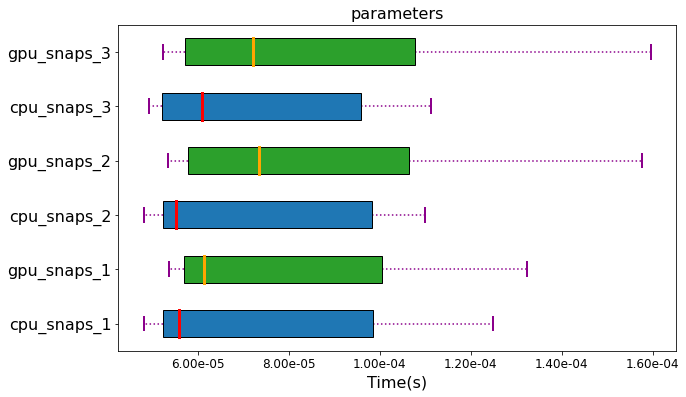

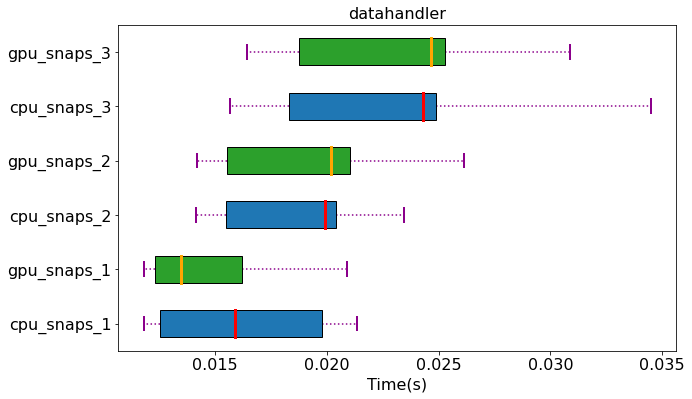

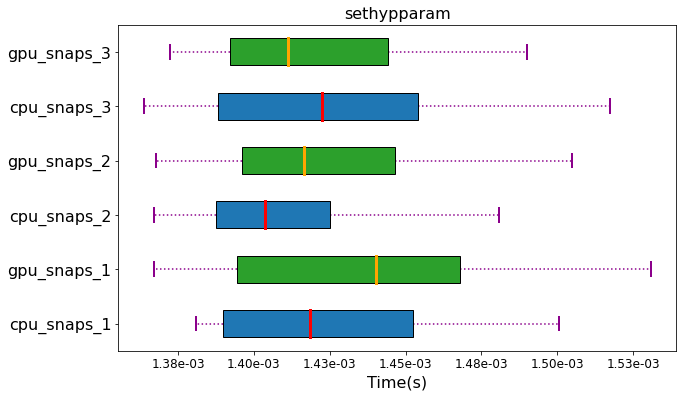

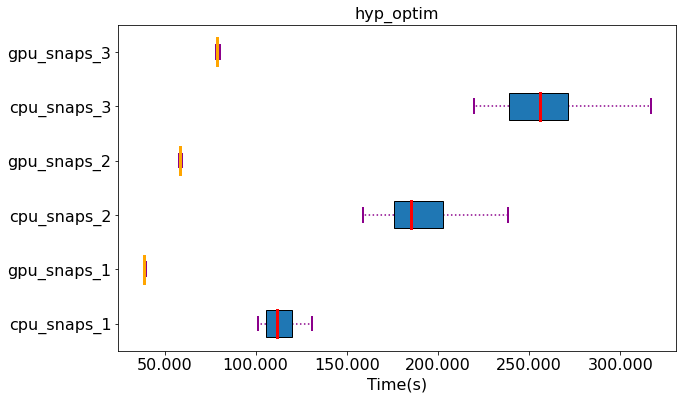

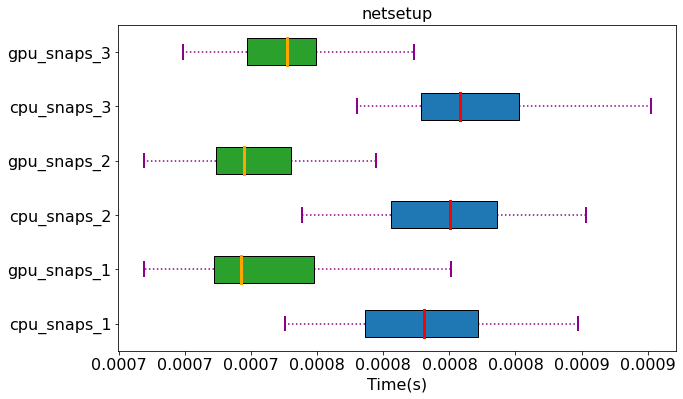

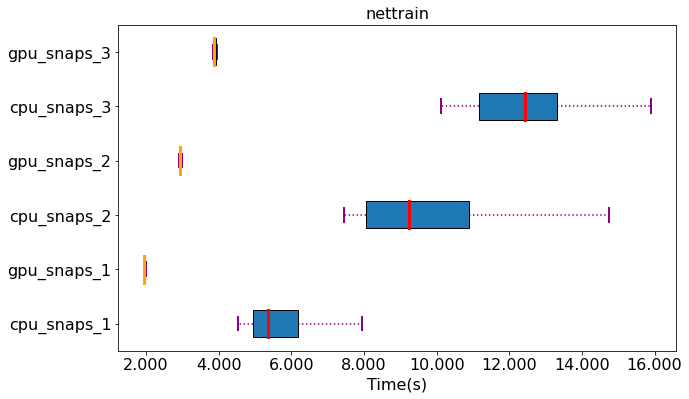

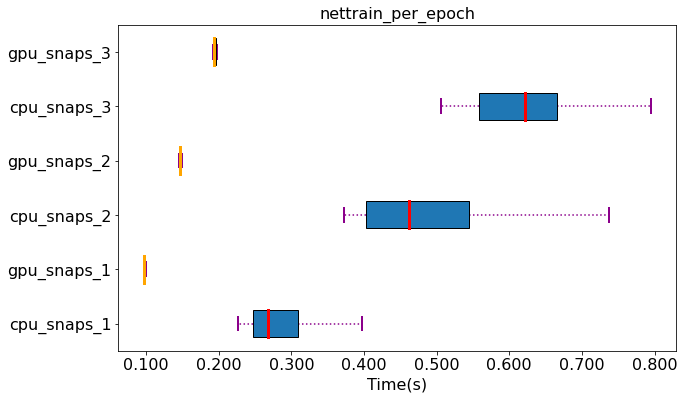

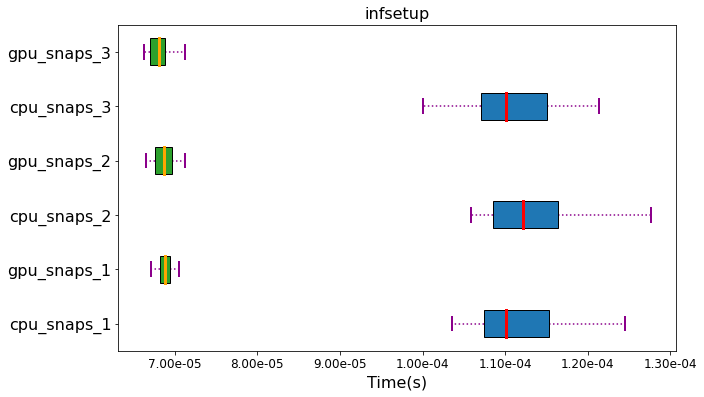

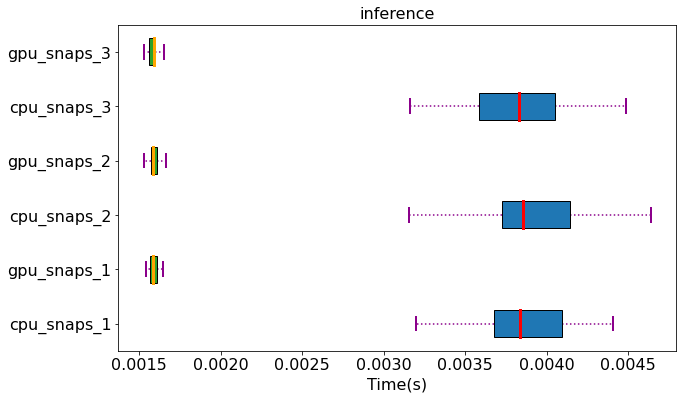

In [39]:
snaps = ["1", "2", "3"]
par = ["parameters", "datahandler", "sethypparam", "hyp_optim", "netsetup", "nettrain", "infsetup", "inference"]
print('NN hyperparameter optimization timing plots' )
generate_box_plots(nn_hypopt_runtime, par, snaps)

In [40]:
filehandler = open('GP_hypopt_runtime.pkl', 'rb')
gp_hypopt_runtime = pickle.load(filehandler)
#type(gp_hypopt_runtime)
#print(gp_hypopt_runtime['cpu_linear_1_parameters'])

In [41]:
for name, numbers in gp_hypopt_runtime.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_linear_1_parameters Used 48 times
	MEDIAN 9.745731949806213e-05
	MEAN   8.697807788848877e-05
	MAX  0.00012826360762119293
	MIN  5.1759183406829834e-05
Item: cpu_linear_1_datahandler Used 48 times
	MEDIAN 0.017081796191632748
	MEAN   0.016365302998262148
	MAX  0.019784700125455856
	MIN  0.013303903862833977
Item: cpu_linear_1_netsetup Used 48 times
	MEDIAN 0.002069074660539627
	MEAN   0.0021128853938231864
	MAX  0.0024089496582746506
	MIN  0.0019177962094545364
Item: cpu_linear_1_hyp_optim Used 48 times
	MEDIAN 3.330545670352876
	MEAN   3.3265900540864095
	MAX  3.569065947085619
	MIN  3.093819396570325
Item: cpu_linear_1_infsetup Used 48 times
	MEDIAN 0.0002201758325099945
	MEAN   0.00021862067903081575
	MAX  0.00023935362696647644
	MIN  0.00019403360784053802
Item: cpu_linear_1_inference Used 48 times
	MEDIAN 0.003555579110980034
	MEAN   0.0035447950940579176
	MAX  0.003868289291858673
	MIN  0.0032223090529441833
Item: cpu_linear_2_parameters Used 43 times
	MEDIAN 6.99665397

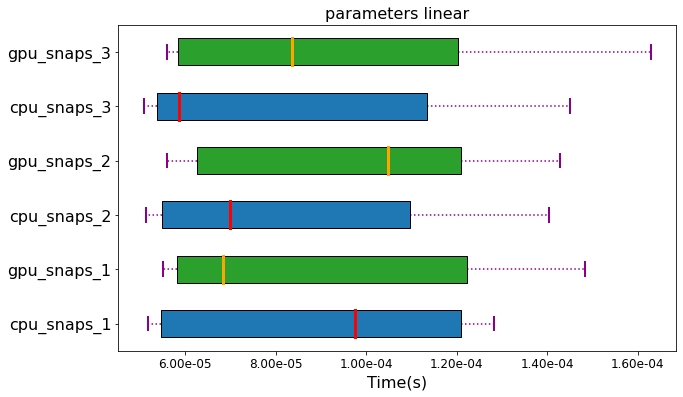

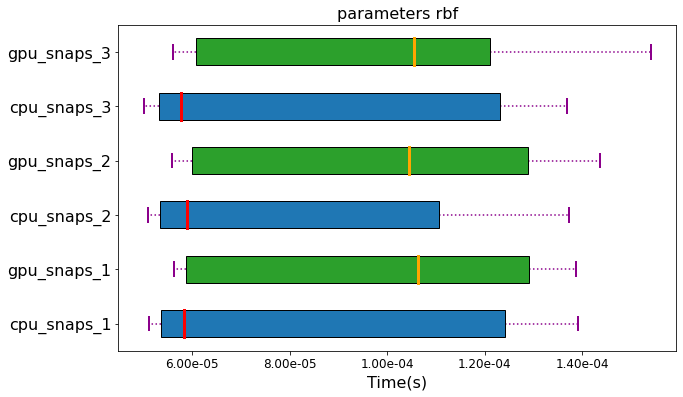

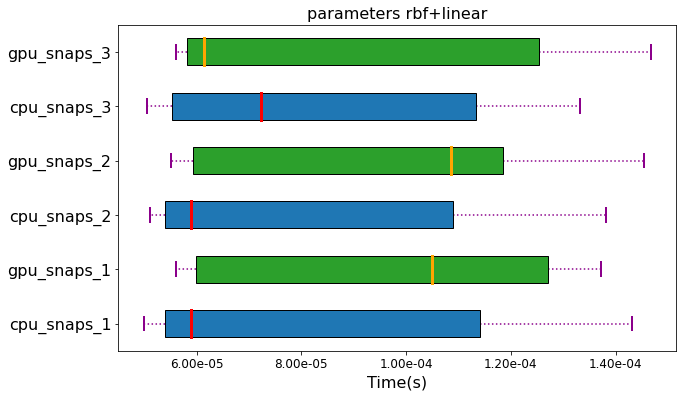

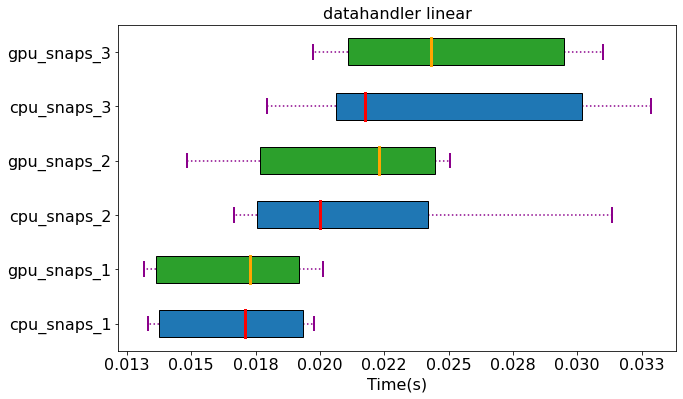

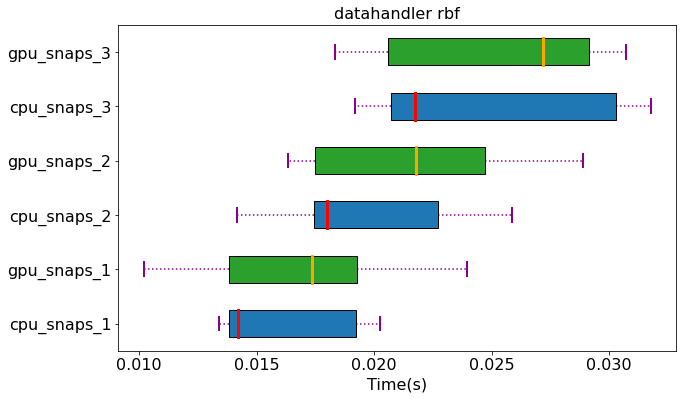

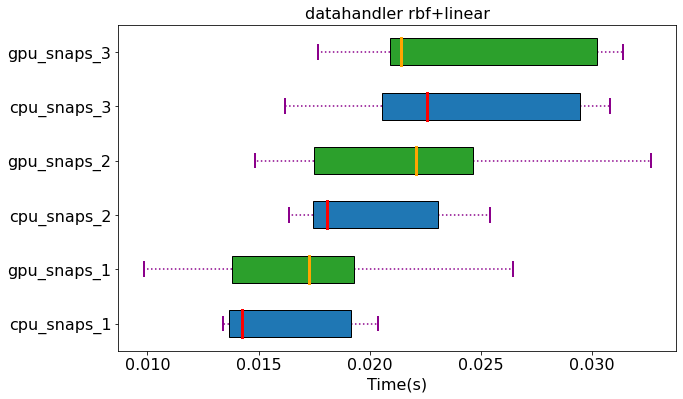

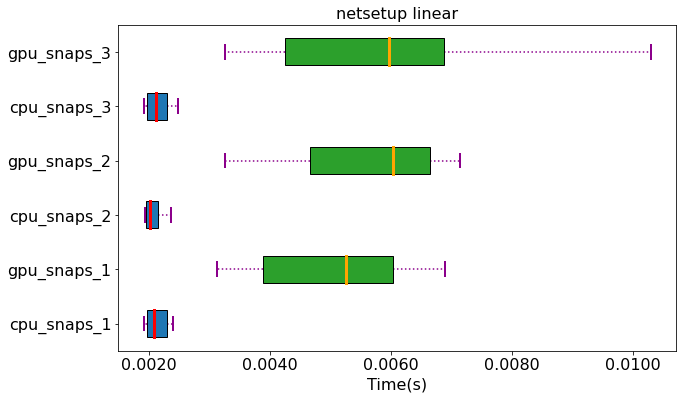

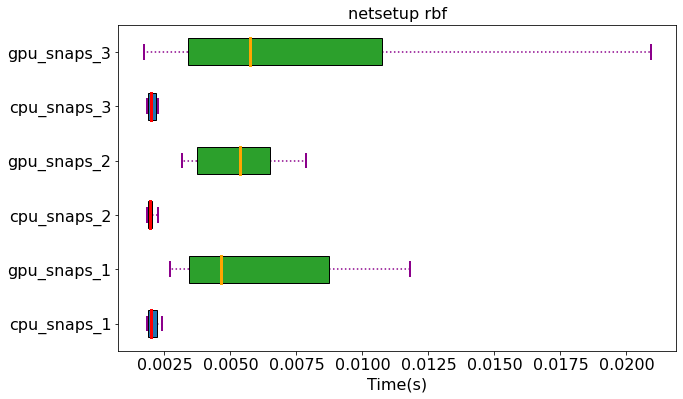

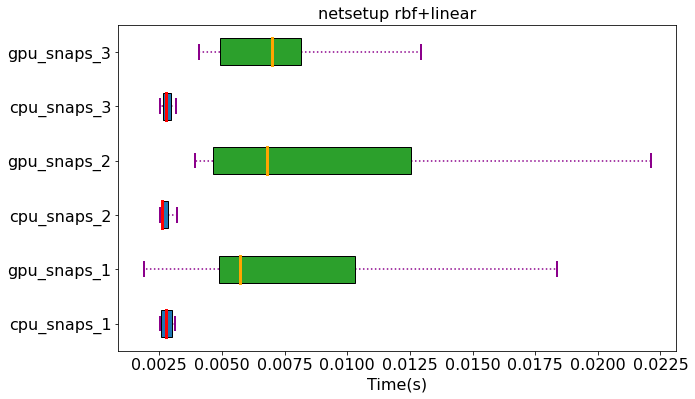

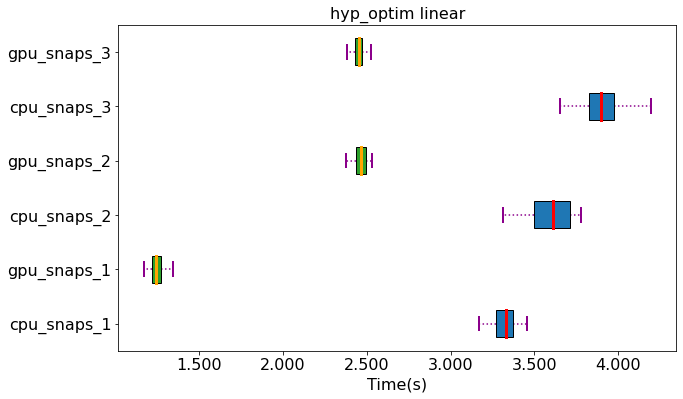

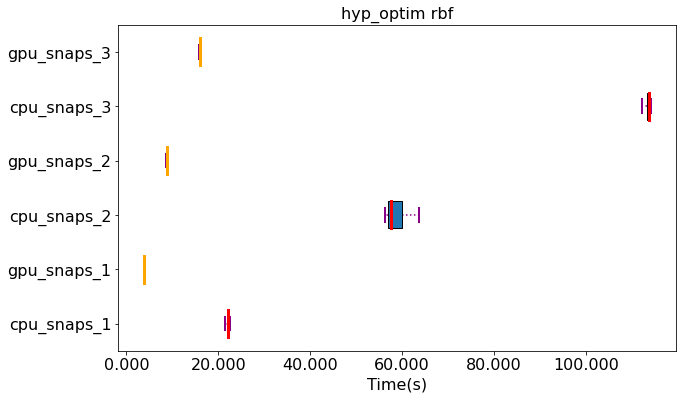

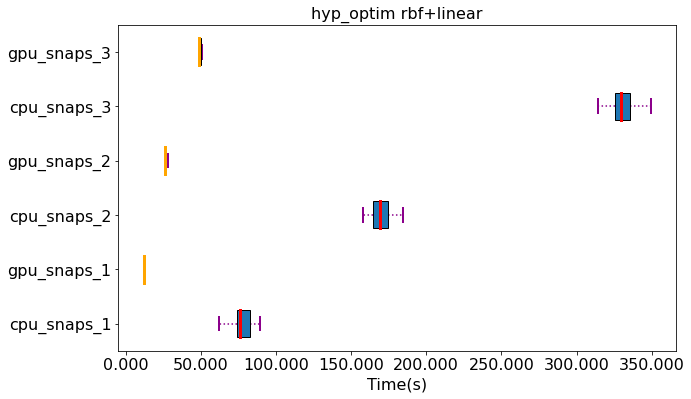

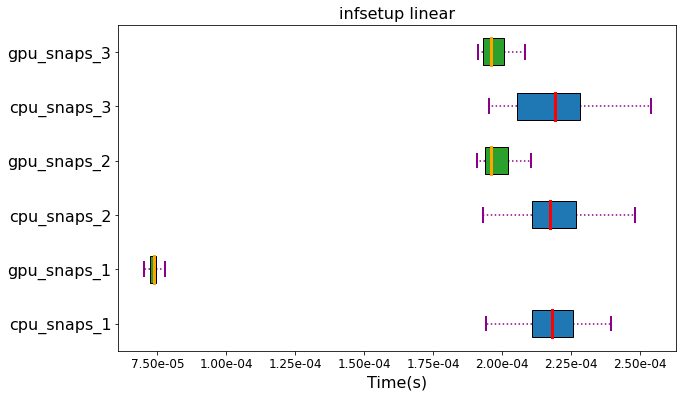

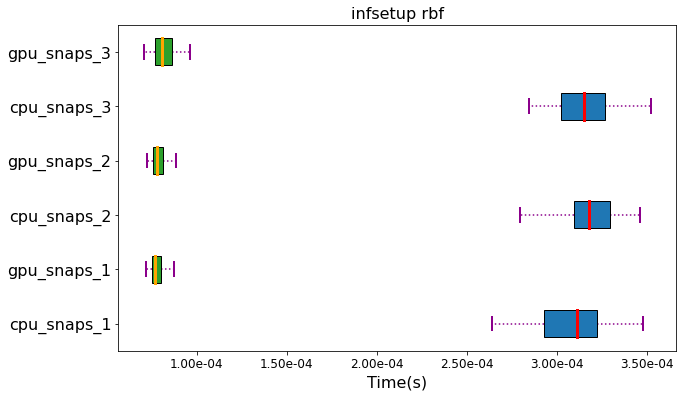

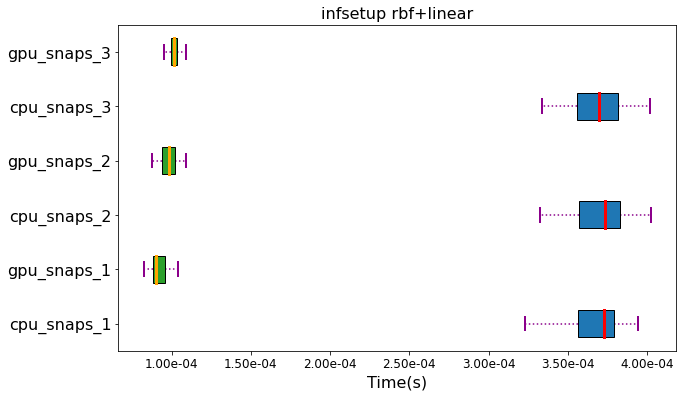

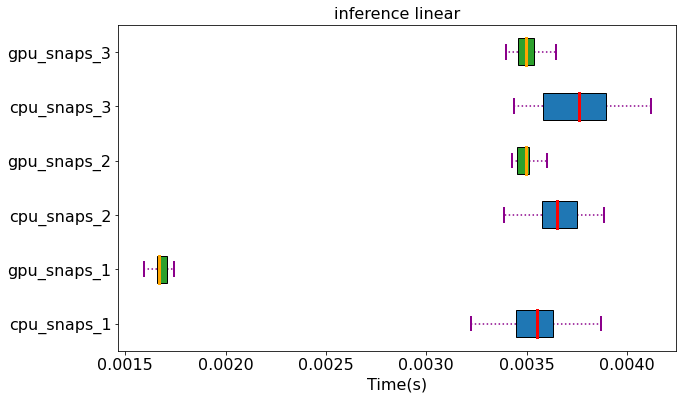

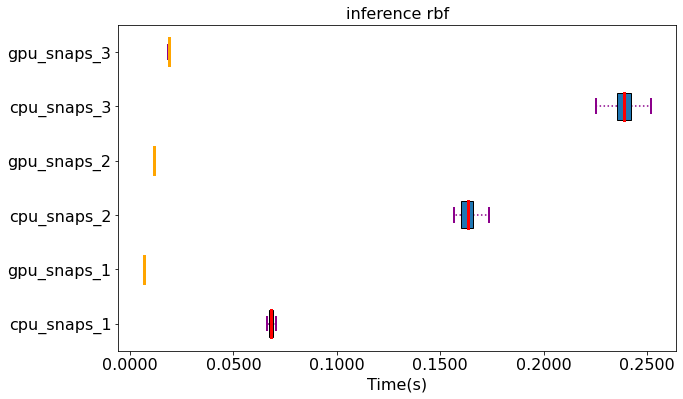

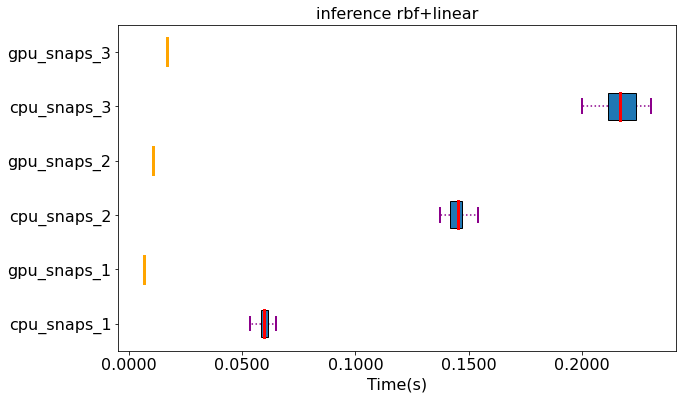

In [42]:
kernels = ["linear", "rbf", "rbf+linear"]
par = ["parameters", "datahandler", "netsetup", "hyp_optim", "infsetup", "inference"]
generate_box_plots(gp_hypopt_runtime, par, snaps, kernels)

In [43]:
dev = ["cpu", "gpu"]
snaps = ["1", "2", "3"]
time_types = ["parameters", "datahandler", "netsetup", "hyp_optim", "infsetup", "inference"]
total_types = ['_'.join(f) for f in itertools.product(dev, snaps, time_types)]
types=[f for f in itertools.product(dev, snaps, time_types)]
#print(types)
gp_hypopt_runtime_comb = {f: [] for f in total_types}

#Combining values from the three kernel cases
#1. The hyp_optim times from three kernel cases are added 
#   up to consider the choice of kernel as a part of GP
#   hyperparameter optimization
#2. All other timings are concatenated to the respective key
#   and averaged out

for name, numbers in gp_hypopt_runtime.items():
    for wordset in types:
        if all(word in name for word in wordset):
            if 'hyp_optim' in wordset:
                gp_hypopt_runtime_comb[f'{wordset[0]}_{wordset[1]}_{wordset[2]}'].append(numbers)
            else:    
                gp_hypopt_runtime_comb[f'{wordset[0]}_{wordset[1]}_{wordset[2]}'].extend(numbers)
        
#len(gp_hypopt_runtime_comb['cpu_1_parameters'])
#print(len(gp_hypopt_runtime_comb['gpu_1_hyp_optim'][1]))

for key in gp_hypopt_runtime_comb:
    if 'hyp_optim' in key:
        gp_hypopt_runtime_comb[key] = [sum(i) for i in zip(gp_hypopt_runtime_comb[key][0], \
                                                           gp_hypopt_runtime_comb[key][1], \
                                                           gp_hypopt_runtime_comb[key][2])]
        
#len(gp_hypopt_runtime_comb['gpu_1_hyp_optim'])

In [44]:
for name, numbers in gp_hypopt_runtime_comb.items():
    print('Item:', name, 'Used', len(numbers), 'times')
    print('\tMEDIAN', statistics.median(numbers))
    print('\tMEAN  ', statistics.mean(numbers))
    print('\tMAX ', max(numbers))
    print('\tMIN ', min(numbers))

Item: cpu_1_parameters Used 144 times
	MEDIAN 5.939509719610214e-05
	MEAN   8.556198897875017e-05
	MAX  0.00014315545558929443
	MIN  4.986859858036041e-05
Item: cpu_1_datahandler Used 144 times
	MEDIAN 0.01424878928810358
	MEAN   0.016261970857158303
	MAX  0.02182850055396557
	MIN  0.013303903862833977
Item: cpu_1_netsetup Used 144 times
	MEDIAN 0.0022424524649977684
	MEAN   0.0023217840353026986
	MAX  0.003112366423010826
	MIN  0.0018266532570123672
Item: cpu_1_hyp_optim Used 45 times
	MEDIAN 105.12768409214914
	MEAN   104.16919519437684
	MAX  123.21038419753313
	MIN  87.9512081798166
Item: cpu_1_infsetup Used 144 times
	MEDIAN 0.0003116391599178314
	MEAN   0.0002990162595071726
	MAX  0.0004056524485349655
	MIN  0.00019403360784053802
Item: cpu_1_inference Used 144 times
	MEDIAN 0.05966794118285179
	MEAN   0.04356114537869063
	MAX  0.07315145060420036
	MIN  0.0032223090529441833
Item: cpu_2_parameters Used 138 times
	MEDIAN 6.0010701417922974e-05
	MEAN   8.21286272527515e-05
	MAX  0.0

In [45]:
def generate_box_plots__nn_gp(nnruntime, gpruntime, parameters, snaps):
    for par in parameters:
        data_cpu = []
        labels_cpu = []
        data_gpu = []
        labels_gpu = []
        for snap in snaps:
            if par == 'train + inference':
                cpunn = (np.array(nn_runtime[f'cpu_{snap}_nettrain']) + np.array(nn_runtime[f'cpu_{snap}_inference']))[2:]
                gpunn = (np.array(nn_runtime[f'gpu_{snap}_nettrain']) + np.array(nn_runtime[f'gpu_{snap}_inference']))[2:]
                cpugp = gpruntime[f'cpu_{snap}_inference'][2:]
                gpugp = gpruntime[f'gpu_{snap}_inference'][2:]
            else:
                cpunn = nnruntime[f'cpu_{snap}_{par}'][2:]
                gpunn = nnruntime[f'gpu_{snap}_{par}'][2:]
                cpugp = gpruntime[f'cpu_{snap}_{par}'][2:]
                gpugp = gpruntime[f'gpu_{snap}_{par}'][2:]
                
            data_cpu.append(cpunn)
            labels_cpu.append(f'nn_snaps_{snap}')
            data_cpu.append(cpugp)
            labels_cpu.append(f'gp_snaps_{snap}')
            
            data_gpu.append(gpunn)
            labels_gpu.append(f'nn_snaps_{snap}')
            data_gpu.append(gpugp)
            labels_gpu.append(f'gp_snaps_{snap}')
            
        datas = [data_cpu, data_gpu]
        labels = [labels_cpu, labels_gpu]
        plot_titles = [f'CPU_{par}', f'GPU_{par}']
        
        for data, label, title in zip(datas, labels, plot_titles):
        
            fig = plt.figure(figsize =(10, 6))
            ax = fig.add_subplot(111)
            # Creating axes instance
            bp = ax.boxplot(data, patch_artist = True,
                            notch = False, vert = 0, showfliers=False)

            colors = ['tab:blue', 'tab:green', 'tab:blue', 'tab:green', 'tab:blue', 'tab:green']
            colors_median = ['red', 'orange', 'red', 'orange', 'red', 'orange']

            for patch, color in zip(bp['boxes'], colors):
                patch.set_facecolor(color)

            # changing color and linewidth of
            # whiskers
            for whisker in bp['whiskers']:
                whisker.set(color ='#8B008B',
                            linewidth = 1.5,
                            linestyle =":")

            # changing color and linewidth of
            # caps
            for cap in bp['caps']:
                cap.set(color ='#8B008B',
                        linewidth = 2)

            # changing color and linewidth of
            # medians
            for median, color in zip(bp['medians'], colors_median):
                median.set(color = color,
                           linewidth = 3)

            # changing style of fliers
            for flier in bp['fliers']:
                flier.set(marker ='D',
                          color ='#e7298a',
                          alpha = 0.5)

            # x-axis labels
            ax.set_yticklabels(label, fontsize=16)
            ax.tick_params(axis='x', labelsize=16)
            ax.set_xlabel('Time(s)', loc='center', fontsize=16)
            
            if 'parameters' in par:
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
                ax.tick_params(axis='x', which='major', labelsize=12)
            elif 'infsetup' in par:
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
                ax.tick_params(axis='x', which='major', labelsize=12)
            elif 'inference' in par:
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
                ax.tick_params(axis='x', which='major', labelsize=12)
            elif par == 'netsetup':
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
                ax.tick_params(axis='x', which='major', labelsize=12)
            else:
                ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

            # Adding title
            
            plt.title(title, fontsize=16)

            # Removing top axes and right axes
            # ticks
            ax.get_xaxis().tick_bottom()
            ax.get_yaxis().tick_left()

            # show plot
            plt.show(bp)

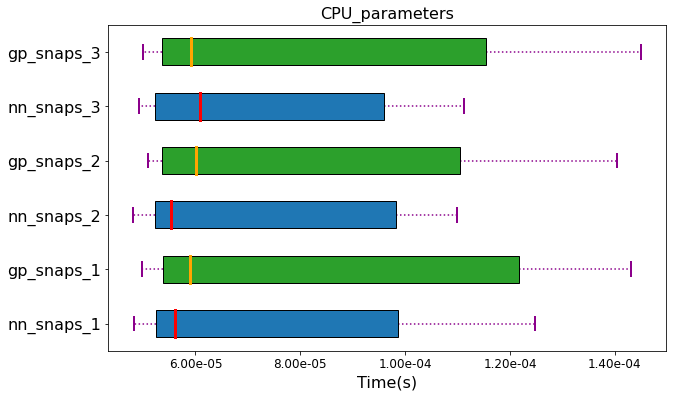

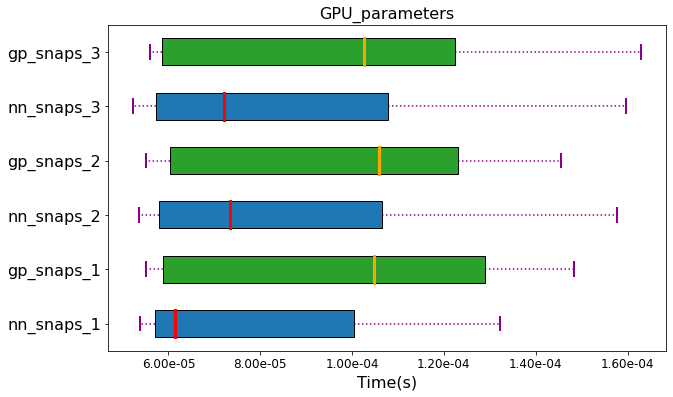

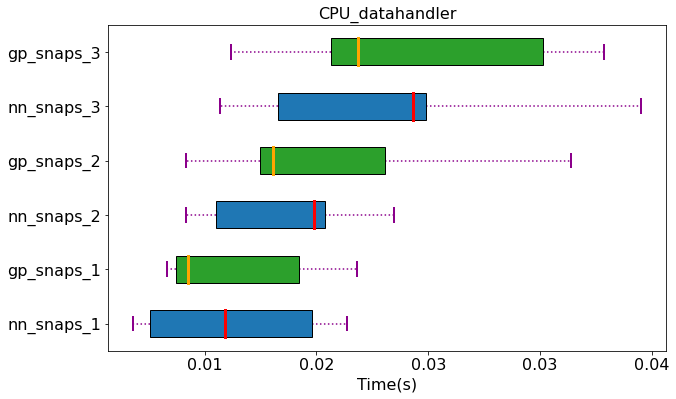

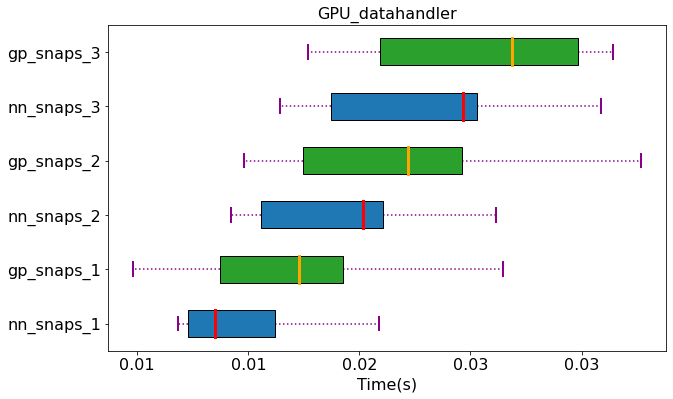

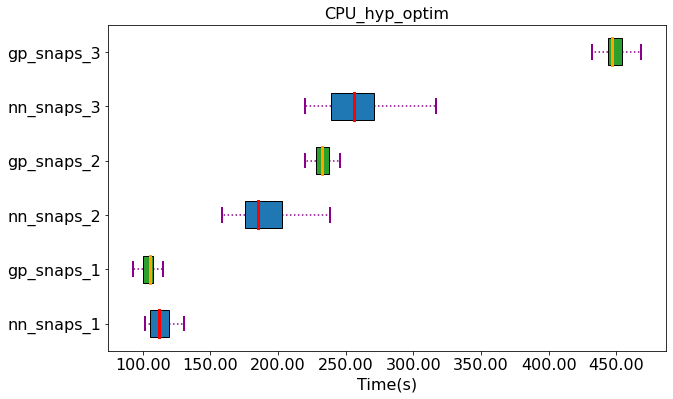

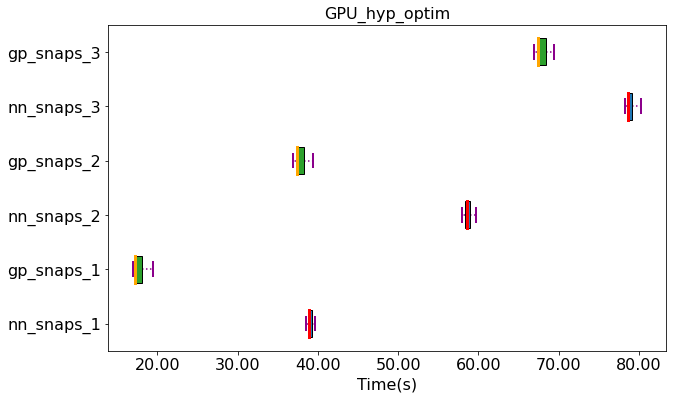

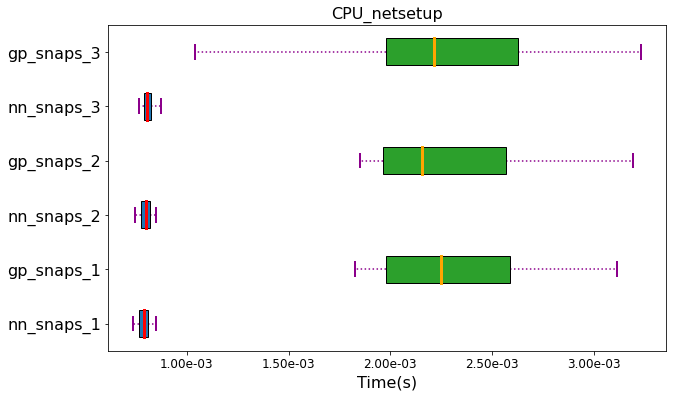

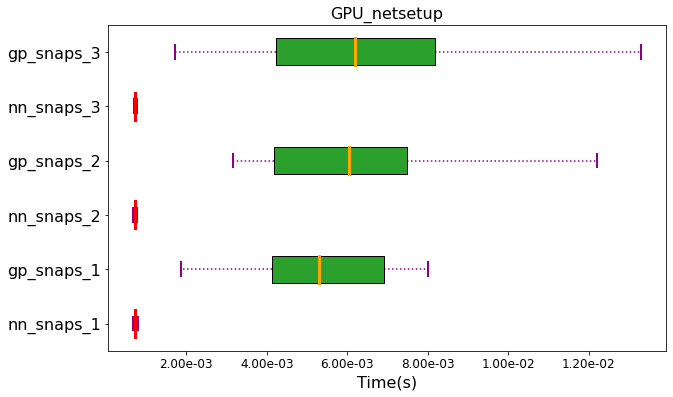

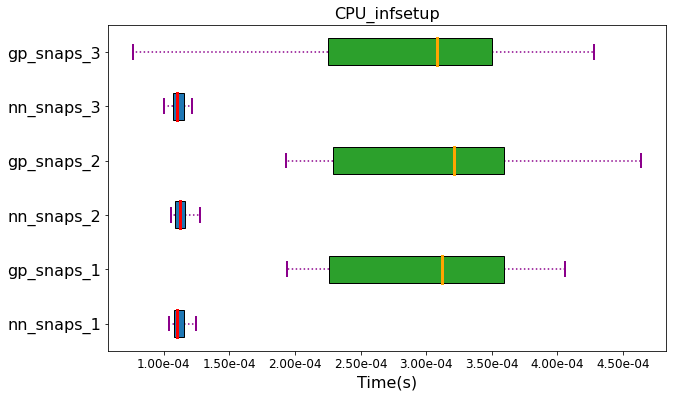

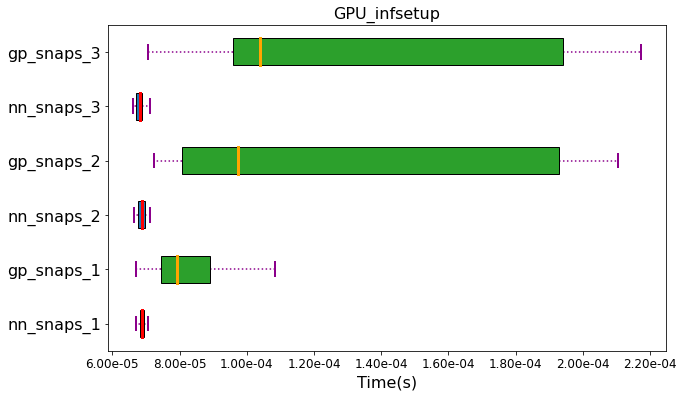

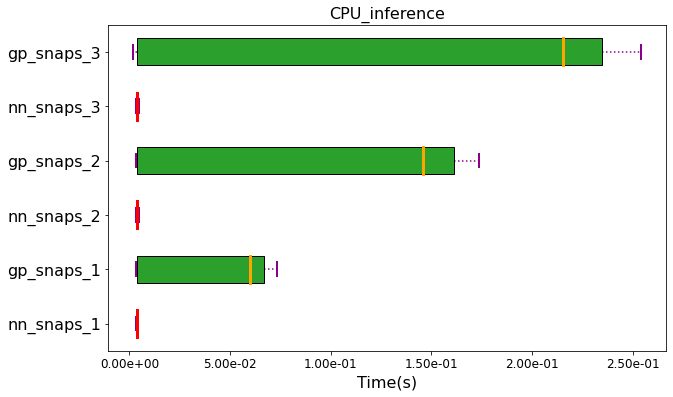

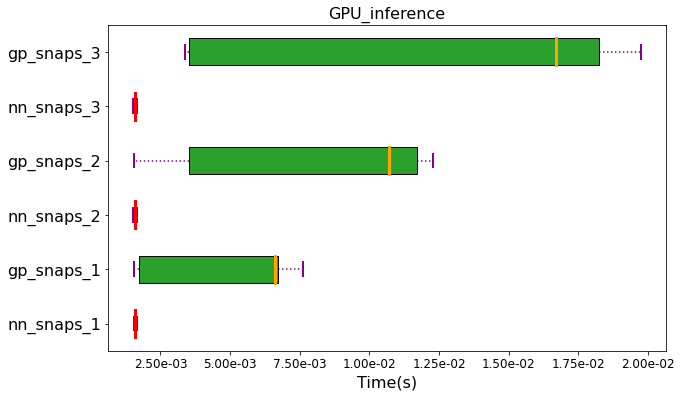

In [46]:
par = ["parameters", "datahandler", "hyp_optim", "netsetup", "infsetup", "inference"]
generate_box_plots__nn_gp(nn_hypopt_runtime, gp_hypopt_runtime_comb, par, snaps)